# 1.5 Text Mining

## Import Libraries

In [3]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhimc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhimc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bhimc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization and graph of the top 10 most common words

In [5]:
# Import txt file

with open('key_events_of_20th_century.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [6]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                              Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1Events in the 20th century    Toggle Events in the 20th century subsection      1.1The world at the beginning of the century      1.1.1"The war to end all wars": World War I (1914â€“1918)        1.1.2The Russian Revolution and Communism          1.2Between the wars      1.2.1Economic depression        1.2.2The rise of dictatorship          1.3Global war: World War II (1939â€“19

In [7]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1Events', 'in', 'the', '20th', 'century', 'Toggle', 'Events', 'in', 'the', '20th', 'century', 'subsection', '1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism', '1.2Between', 'the', 'wars', '1.

In [8]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4908 samples and 21255 outcomes>


In [9]:
dist_words.most_common(10)

[('.', 1570),
 ('the', 1095),
 (',', 990),
 ('of', 604),
 ('and', 398),
 ('to', 325),
 ('The', 318),
 ('[', 303),
 (']', 303),
 ('in', 291)]

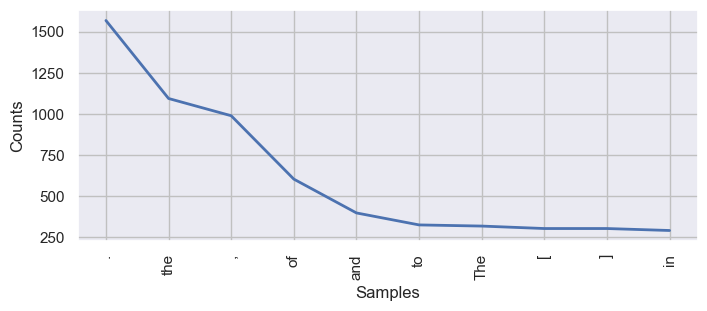

In [12]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Remove Stop Words

In [14]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'wasn', "wouldn't", 'when', 'whom', 'couldn', 'wouldn', "mustn't", 'all', "you're", 'down', 'for', 'has', 'before', "wasn't", 'yourself', 'they', 'as', 'this', 'be', 'a', 'both', 'such', "mightn't", 'under', 'him', 'am', 'over', 'then', 'more', 'm', 'other', 'hers', 'their', 'about', 'mightn', 'after', 'of', 'what', 'were', 'who', 'too', "hasn't", 'ourselves', 'from', 'because', "haven't", 'but', 'having', 'out', 'any', 'same', 'above', "don't", 'had', 'our', 'do', 'and', "won't", 'i', "shan't", 'few', 'it', 'or', 'where', "hadn't", 'needn', 'me', 'weren', 'myself', 'again', 'not', 'below', 'on', 'there', "should've", 'ain', 'aren', 'ma', 'just', 'shan', 'haven', 'y', 'at', 'off', "she's", 'my', 'was', 'against', "couldn't", 'if', 'through', 'in', 'that', 'until', "that'll", 'than', 'them', "shouldn't", 'no', 'once', 'can', "weren't", 'into', 're', 'up', 'now', 'you', 'these', 'will', 'didn', 'how', 'should', 'hadn', 'with', 've', 'shouldn', 'is', 't', "you've", 'd', 'doesn', 'hasn', 

In [15]:
# Removing stopwords in sentences

# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [16]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [17]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4805 samples and 16590 outcomes>


In [18]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [19]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Events', 'th', 'century', 'Toggle', 'Events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific

In [20]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

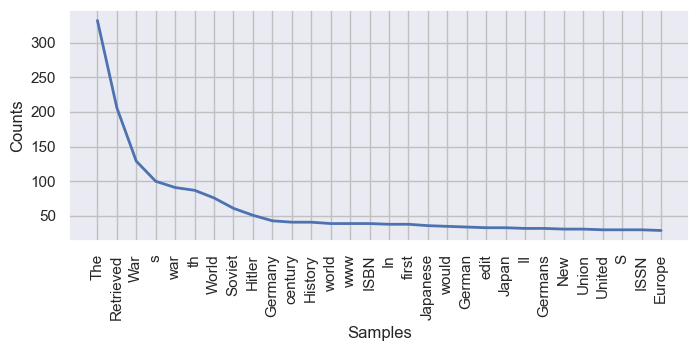

In [21]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

### Something I noticed is that the number of outcomes has decreased, the graph looks much diffrent since many words except "The", "Retrived", and "War" aren't mentioned. I wasn't expecting the word "Retrived" to be mentioned a lot since I rarely hear that word being used in many settings, but I was expecting "The" and "War" to be mentioned since they are common words and "war" is a key event of the 20th century.

# Create a tags list using TextBlob

In [22]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [23]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [24]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 13 ms


In [25]:
tags_list = text.tags

In [26]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Personal", 'NNP'

In [27]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [28]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [29]:
df_t = df_text.groupby('Word type').count().reset_index()

In [30]:
top10 = df_t.nlargest(10, 'Words')

## Create bar charts with the top 15 POS lables

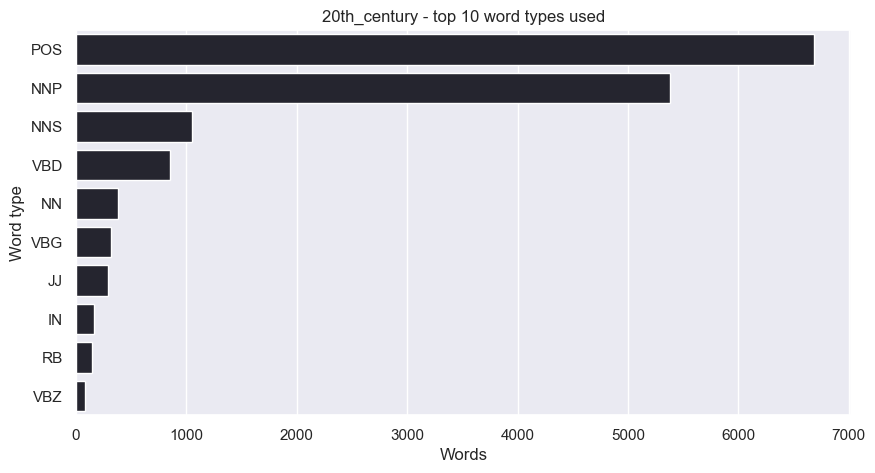

In [31]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th_century - top 10 word types used")

In [32]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top10=y.nlargest(10, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

### Nouns

In [33]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(10, 'Occurences')

In [34]:
top15

,Word,Occurences
1257,'War,129
2579,'war,91
2498,'th,87
1304,'World,76
1104,'Soviet,61
535,'Hitler,51
1493,'century,41
534,'History,41
2612,'www,39
557,'ISBN,39


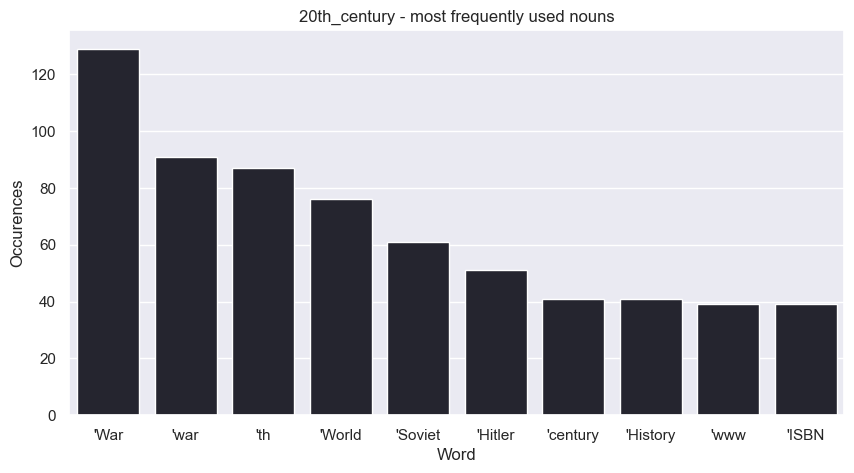

In [37]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th_century - most frequently used nouns")

### Verbs

In [38]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [39]:
top15

,Word,Occurences
26,'Retrieved,206
35,'United,30
0,'Allied,19
195,'led,15
315,'used,13
193,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
307,'turned,7


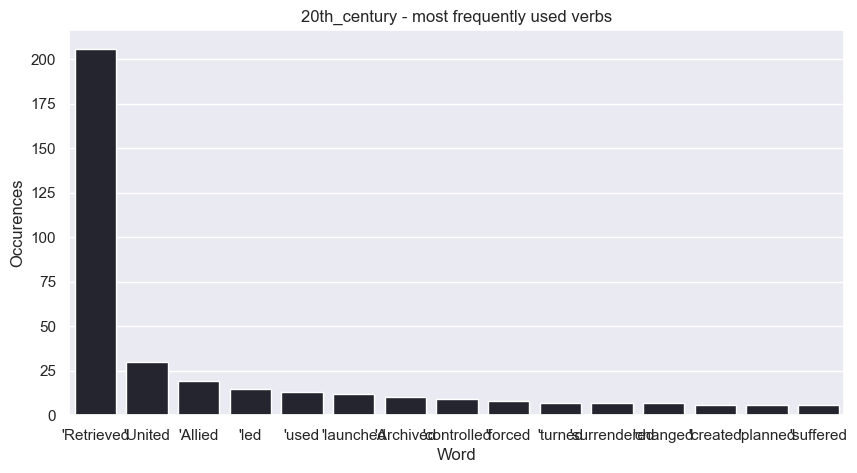

In [40]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("20th_century - most frequently used verbs")

### Adjectives

In [41]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

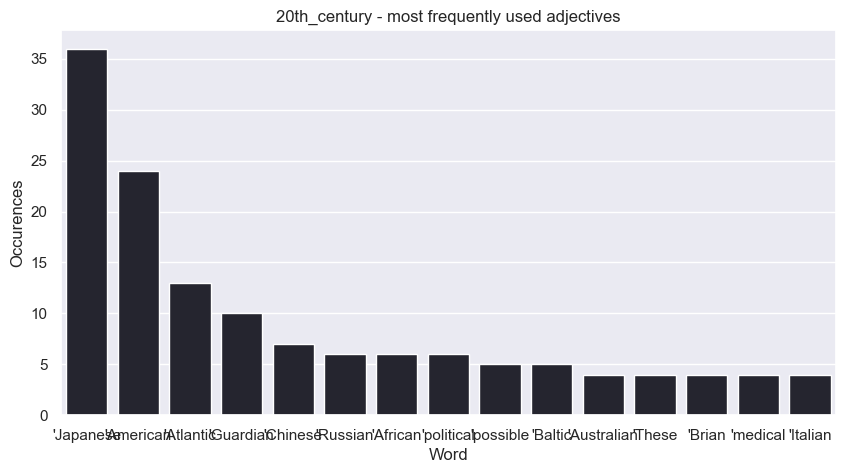

In [42]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("20th_century - most frequently used adjectives")

### Something I noticed when analyzing the graphs is that many of these words such as "allied", "war" and "Japanese" are all words that I have heard a lot when learni

## Dataframe with the countries and how often they are mentioned in text

In [43]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events th century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload file Search Search Create account Log Personal tools Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Events th century Toggle Events th century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggle table contents Key events th centur

In [44]:
# Create a count for the countries

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [45]:
all_counts

Counter({'Retrieved': 206,
         'War': 129,
         'war': 91,
         'th': 87,
         'World': 76,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 43,
         'century': 41,
         'History': 41,
         'world': 39,
         'www': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'II': 32,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'history': 24,
         'This': 24,
         'American': 24,
         'weapons': 24,
         'attack': 23,
         'Main': 22,
         'Holocaust': 22,
         'new': 22,
         'St

In [48]:
countries = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [49]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [56]:
# Strip leading and trailing spaces from the 'country_name' column
countries['country_name'] = countries['country_name'].str.strip()

In [57]:
countries

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
...,...
205,Sahrawi Arab Democratic Republic
206,Somaliland
207,South Ossetia
208,Taiwan


In [63]:
list_countries = countries['country_name'].to_list()

In [64]:
list_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

In [65]:
dict_of_counts = {d : all_counts[d] for d in list_countries}

In [66]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [70]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [71]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df = df.transpose().reset_index()

In [73]:
df.dtypes

index    object
0         int64
dtype: object

In [74]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [76]:
df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [77]:
df

,Character,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [80]:
# I accidentally names one of the columns to "Character", so I will rename the column to "Country".

In [78]:
df.rename(columns={'Character': 'country'}, inplace=True)

In [79]:
df

,country,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [81]:
df.shape

(208, 2)

## Create a plot showing the frequency of the number of times a country is mentioned in text

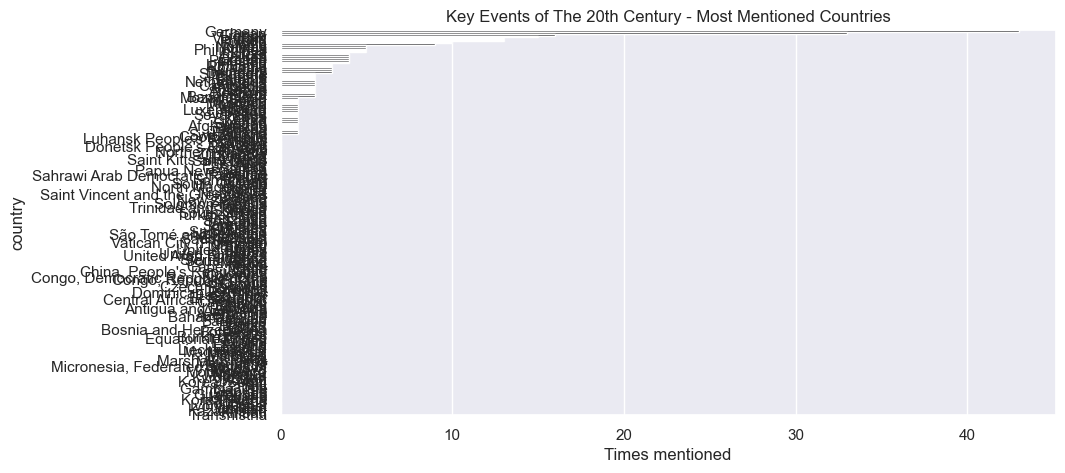

In [82]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "country",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("Key Events of The 20th Century - Most Mentioned Countries")

In [83]:
#The bar graph above shows all of the countries, which makes the graph unreadible and cramed, so I am creating another graph that shows only the top 15 countries mentioned

In [84]:
# Sort the DataFrame by 'Times mentioned' in descending order and get the top 15
top_countries = df.sort_values(by='Times mentioned', ascending=False).head(15)

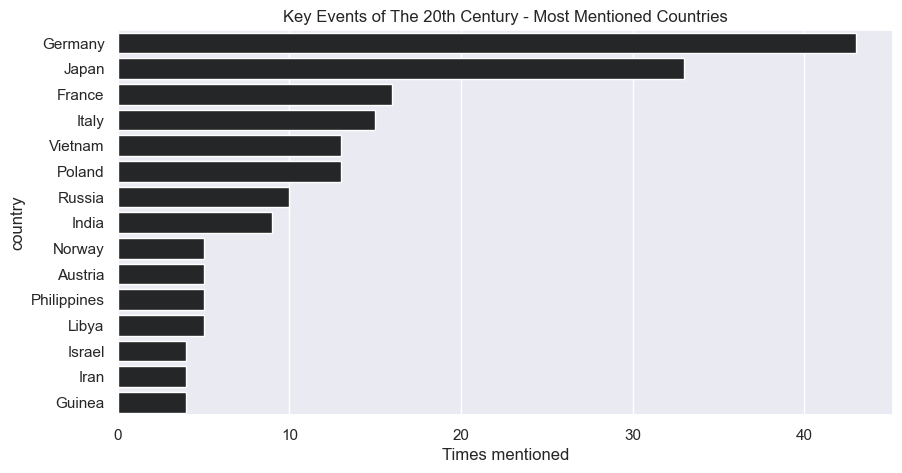

In [85]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x ='Times mentioned', y='country', 
    saturation=0.9, data=top_countries,).set_title("Key Events of The 20th Century - Most Mentioned Countries")

### something that I notice in the graph above is that Germany, Japan, and France are the most mentioned countries. I was not suprised with these results because these three countries were heavily involved in World War II which is a major event in the 20th century. 